## 第一題

In [127]:
%matplotlib inline
import pandas
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

In [155]:
header_list = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_raw = pd.read_csv("adult.data", header = None, names = header_list, na_values=[' ?'])
test_raw = pd.read_csv("adult.test", header = None, names = header_list, na_values=[' ?'], skiprows = 1)
train_raw.dropna(axis = 0, inplace = True, how = "any")
test_raw.dropna(axis = 0, inplace = True, how = "any")

In [156]:
y_train = train_raw['income'].apply(lambda x: 1 if x == ' >50K' else 0).values
y_test = test_raw['income'].apply(lambda x: 1 if x == ' >50K.' else 0).values

num_col = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']
scaler = StandardScaler()
train_raw[num_col] = scaler.fit_transform(train_raw[num_col])
test_raw[num_col] = scaler.transform(test_raw[num_col])

cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for i in cat_col:
    train_raw[i] = train_raw[i].apply(lambda x: x[1:])
    test_raw[i] = test_raw[i].apply(lambda x: x[1:])

ohe = OneHotEncoder(categories='auto')
feat = ohe.fit_transform(train_raw[cat_col]).toarray()
train_cat = pd.DataFrame(feat, columns=ohe.get_feature_names(cat_col))

feat = ohe.transform(test_raw[cat_col]).toarray()
test_cat = pd.DataFrame(feat, columns=ohe.get_feature_names(cat_col))

remove = []
for col in train_cat.columns:
    if train_cat[col].sum() < 10:
        remove.append(col)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [157]:
order = ['relationship_Husband',
        'relationship_Not-in-family', 'relationship_Other-relative',
        'relationship_Own-child', 'relationship_Unmarried',
        'relationship_Wife', 'race_Amer-Indian-Eskimo',
        'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
        'race_White', 'gender_Female', 'gender_Male',
        'occupation_Adm-clerical', 'occupation_Craft-repair',
        'occupation_Exec-managerial', 'occupation_Farming-fishing',
        'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
        'occupation_Other-service', 'occupation_Priv-house-serv',
        'occupation_Prof-specialty', 'occupation_Protective-serv',
        'occupation_Sales', 'occupation_Tech-support',
        'occupation_Transport-moving', 'education_10th', 'education_11th',
        'education_12th', 'education_1st-4th', 'education_5th-6th',
        'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
        'education_Assoc-voc', 'education_Bachelors',
        'education_Doctorate', 'education_HS-grad', 'education_Masters',
        'education_Preschool', 'education_Prof-school',
        'education_Some-college', 'native-country_Cambodia',
        'native-country_Canada', 'native-country_China',
        'native-country_Columbia', 'native-country_Cuba',
        'native-country_Dominican-Republic', 'native-country_Ecuador',
        'native-country_El-Salvador', 'native-country_England',
        'native-country_France', 'native-country_Germany',
        'native-country_Greece', 'native-country_Guatemala',
        'native-country_Haiti', 'native-country_Honduras',
        'native-country_Hong', 'native-country_Hungary',
        'native-country_India', 'native-country_Iran',
        'native-country_Ireland', 'native-country_Italy',
        'native-country_Jamaica', 'native-country_Japan',
        'native-country_Laos', 'native-country_Mexico',
        'native-country_Nicaragua',
        'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
        'native-country_Philippines', 'native-country_Poland',
        'native-country_Portugal', 'native-country_Puerto-Rico',
        'native-country_Scotland', 'native-country_South',
        'native-country_Taiwan', 'native-country_Thailand',
        'native-country_Trinadad&Tobago', 'native-country_United-States',
        'native-country_Vietnam', 'native-country_Yugoslavia',
        'workclass_Federal-gov', 'workclass_Local-gov',
        'workclass_Private', 'workclass_Self-emp-inc',
        'workclass_Self-emp-not-inc', 'workclass_State-gov',
        'workclass_Without-pay', 'marital-status_Divorced',
        'marital-status_Married-AF-spouse',
        'marital-status_Married-civ-spouse',
        'marital-status_Married-spouse-absent',
        'marital-status_Never-married', 'marital-status_Separated',
        'marital-status_Widowed']

In [158]:
train = np.hstack((train_raw[num_col].values, train_cat[order]))
test = np.hstack((test_raw[num_col].values, test_cat[order]))
adult50k = {'x_train':train, 'x_test':test, 'y_train':y_train, 'y_test':y_test}

In [159]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
    
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


## 第二題

#### Q2.1

In [17]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk) 

Accuracy = 0.848406


In [160]:
df = pd.DataFrame({'true': adult50kp['y_test'], 'ypred': ypredprob[:,1]})

In [161]:
roc = []
roc.append({'fp_rate': 0.0, 'tp_rate': 0.0})

for i in df.ypred.unique():    
    df['ypredpos'] = (df.ypred >= i).astype('float')
    tp = np.sum(df['true'] * df['ypredpos'])
    tn = np.sum((1 - df['true']) * (1 - df['ypredpos']))
    fp = np.sum((1 - df['true']) * df['ypredpos'])
    fn = np.sum(df['true'] * (1 - df['ypredpos']))
    
    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    roc.append({'fp_rate': fp_rate, 'tp_rate': tp_rate})
    
roc.append({'fp_rate': 1.0, 'tp_rate': 1.0})

In [162]:
roc_df = pd.DataFrame(roc)
roc_df.sort_values('fp_rate', inplace = True)

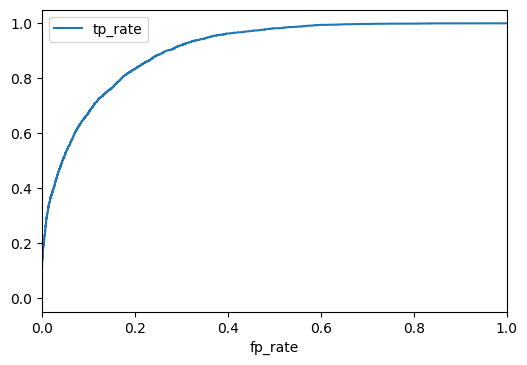

In [172]:
plt.rcParams["figure.dpi"] = 100
roc_df.plot(x = "fp_rate", y = 'tp_rate', kind = 'line')

#### Q2.2

In [166]:
roc_df['fp_rate_pre'] = roc_df.fp_rate.shift(1)
roc_df['tp_rate_pre'] = roc_df.tp_rate.shift(1)
roc_df['base'] = roc_df.fp_rate - roc_df.fp_rate_pre
roc_df['height'] = (roc_df.tp_rate + roc_df.tp_rate_pre) / 2
roc_df['area'] = roc_df.base * roc_df.height

In [167]:
print("AUC = ", roc_df.area.sum())

AUC =  0.9034904715454891


## 第三題

#### Q1.1

The gradient of E(w) is: $\nabla E(w) = \Lambda w + X^T (y - t)$. 

The hession of E(w) is $H = X^T R X + \Lambda$

$R$ is a diagonal matrix with $R_{ii} = y_i (1 - y_i)$ and $y_i = \frac{1}{1 + exp({-w^T x_i})}$. 

#### Q1.2

In [44]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 100, tol = 1e-5, add_intercept = True):
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):
        if self.add_intercept: x = np.c_[x, np.ones(x.shape[0])]
        
        #initial w, with ridge regression
        inv_xtx = np.linalg.pinv(np.dot(np.transpose(x), x) + np.diag(self.reg_vec))
        w = np.dot(inv_xtx, np.dot(np.transpose(x), y))

        obj = np.inf
        best_w = None
        for i in range(self.max_iter):    
            y0 = self.__sigmoid(np.dot(x, w))
            #gradient
            grad = self.reg_vec * w + np.dot(np.transpose(x), y0 - y)
            R = np.diag(y0 * (1-y0))
            #hession
            hess = np.diag(self.reg_vec) + np.dot(np.transpose(x), np.dot(R, x))
            
            #newton update
            w -= np.dot(np.linalg.inv(hess), grad)
            y0 = self.__sigmoid(np.dot(x, w))
            now = np.sum(np.square(w) * self.reg_vec) * 0.5  - np.sum(y * np.log(y0) + (1-y) * np.log(1-y0))
               
            if now < obj:
                best_w = w

            if (obj - now) < self.tol:
                self.cnt = i + 1
                break
            obj = now
            self.w = best_w
            self.obj_value = obj

    def predict(self, x):
        if self.add_intercept:
            x = np.c_[x, np.ones(x.shape[0])]
        ypred = self.__sigmoid(np.dot(x, self.w))
        ypred = (ypred >= 0.5).astype('float64')
        return(ypred)                

In [28]:
from sklearn import metrics
def acc(ypred, ytest): return metrics.accuracy_score(ypred, ytest)

##### Case 1: lambda = 1 for all coefficients

In [168]:
lambda_vec = np.ones(x_train.shape[1] + 1)
model = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

print("accuracy:", acc(y_test, ypred))
print("continuous-valued w = ", model.w[0:5])
print("binary-valued w = ", model.w[10:15])
print("constant term = ", model.w[-1])

accuracy: 0.8480743691899071
continuous-valued w =  [0.00063868 0.02902158 0.00031659 0.18580616 0.02485913]
binary-valued w =  [-0.50152492  0.74781984 -1.02439618 -0.29266873 -0.6351957 ]
constant term =  -3.3337454041891306


##### Case 2: lambda = 1 for all but the intercept, no regularization for intercept term

In [173]:
lambda_vec = np.ones(x_train.shape[1] + 1)
lambda_vec[-1] = 0.0
model = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

print("accuracy:", acc(y_test, ypred))
print("continuous-valued w = ", model.w[0:5])
print("binary-valued w = ", model.w[10:15])
print("constant term = ", model.w[-1])

accuracy: 0.847808764940239
continuous-valued w =  [0.00063965 0.02949145 0.00031702 0.29532492 0.02543368]
binary-valued w =  [ 0.07530145  1.28789619 -0.37204838  0.39436062  0.04306939]
constant term =  -8.887227775664206


##### Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term

In [35]:
lambda_vec = np.ones(x_train.shape[1] + 1) 
lambda_vec[-1] = 0.0
lambda_vec[len(cont_var):] = 15
model = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

print("accuracy:", acc(ypred, y_test))
print("continuous-valued w = ", model.w[0:5])
print("binary-valued w = ", model.w[10:15])
print("constant term = ", model.w[-1])

accuracy: 0.84800796812749
continuous-valued w =  [0.34995101 0.72781415 0.33261563 0.25677883 2.31859243]
binary-valued w =  [-0.07487908  0.00180633 -0.22739145 -0.56278418 -1.06014632]
constant term =  -1.0701453793576885


#### Q1.3

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_subtrain, x_tune, y_subtrain, y_tune = train_test_split(x_train, y_train, test_size = 0.2, random_state = 500)

grids = np.logspace(-2, 2, 10)

In [42]:
step_1 = []
for i in grids:
    lambda_vec = np.ones(x_train.shape[1] + 1) * i
    lambda_vec[-1] = 0.0
    model = mylogistic_l2(max_iter = 100, tol = 1e-5, add_intercept = True, reg_vec = lambda_vec)
    model.fit(x_subtrain, y_subtrain)
    ypred = model.predict(x_tune)
    step_1.append(acc(y_tune, ypred))

a1_star = grids[step_1.index(max(step_1))]
print("Best a1, a2 are ", a1_star)

Best a1, a2 are  0.5994842503189409


In [174]:
#Step 2

step_2 = []
for i in grids:
    lambda_vec = np.ones(x_train.shape[1] + 1) * a1_star
    lambda_vec[len(cont_var) : -1] = i
    lambda_vec[-1] = 0.0
    model = mylogistic_l2(max_iter = 100, tol = 1e-5, add_intercept = True, reg_vec = lambda_vec)
    model.fit(x_subtrain, y_subtrain)
    ypred = model.predict(x_tune)
    step_2.append(acc(y_tune, ypred))
    
a2_star = grids[step_2.index(max(step_2))]
print('new a2 is', a2_star)

new a2 is 0.01


In [175]:
#step 3

step_3 = []
for i in grids:
    lambda_vec = np.ones(x_train.shape[1] + 1) * a2_star
    lambda_vec[0:len(cont_var)] = i 
    lambda_vec[-1] = 0.0
    model = mylogistic_l2(max_iter = 100, tol = 1e-5, add_intercept = True, reg_vec = lambda_vec)
    model.fit(x_subtrain, y_subtrain)
    ypred = model.predict(x_tune)
    step_3.append(acc(y_tune, ypred))
    
a1_star = grids[step_3.index(max(step_3))]
print("new a1 is", a1_star)

new a1 is 0.5994842503189409


In [176]:
#final step

lambda_vec = np.ones(x_train.shape[1] + 1) * a2＿star    
lambda_vec[0:len(cont_var)] = a1_star
lambda_vec[-1] = 0.0
model = mylogistic_l2(reg_vec = lambda_vec, max_iter = 100, tol = 1e-5, add_intercept = True)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

print("Final best a1 is", a1_star, "best a2 is", a2_star)
print("accuracy = ", acc(y_test, ypred))

Final best a1 is 0.5994842503189409 best a2 is 0.01
accuracy =  0.847808764940239


#### Q1.4

In [40]:
a = []

for i in grids:
    log = LogisticRegression(solver = 'lbfgs', C = i, max_iter = 1000)
    log.fit(x_subtrain, y_subtrain)
    ypred = log.predict(x_tune)
    a.append(acc(ypred, y_tune))
    
log = LogisticRegression(solver = 'lbfgs', C = grids[np.argmax(acc)], max_iter = 1000)
log.fit(x_train, y_train)
ypred = log.predict(x_test)

print("Accuracy = ", acc(y_test, ypred))

Accuracy =  0.8456175298804781


In [41]:
log.coef_

array([[ 3.30661570e-01,  6.94465827e-01,  3.34682848e-01,
         2.39713877e-01,  1.56066346e+00,  7.37016578e-02,
        -7.71439682e-02,  5.89295939e-02, -4.21788191e-02,
        -6.77963613e-02,  1.28009902e-01,  2.70708653e-01,
        -1.35401885e-01, -1.92220128e-01, -5.61404701e-01,
        -2.58625018e-01,  8.76763427e-01, -2.21594451e-01,
         6.32474594e-02,  1.06892455e+00, -5.94723017e-02,
        -6.31472997e-01, -1.37597703e-01, -8.22142126e-02,
         3.23663818e-01, -5.58322619e-02,  4.02955599e-02,
         1.74627350e-01, -3.41175353e-01, -1.18250366e-01,
        -2.35083992e-02, -2.43074673e-01,  2.42895021e-01,
         3.45255190e-02,  3.48503317e-02, -3.32908060e-02,
        -5.95511067e-02,  2.99550266e-02, -3.69153386e-02,
        -8.33706623e-03, -2.75887870e-02,  3.37426136e-02,
         2.53933568e-02,  5.98773360e-02, -2.95466905e-02,
        -7.04911609e-03, -4.15550262e-03, -2.81003784e-03,
         2.67459891e-03, -2.26127312e-03, -2.34849721e-0

In [177]:
np.set_printoptions(suppress=True) 
model.w

array([ 0.00064001,  0.02950802,  0.00031724,  0.31203001,  0.02546573,
        0.00000075, -0.07407873,  0.22531258, -0.59100468, -0.92609569,
        0.10326537,  1.26260115, -0.38124735,  0.40916348,  0.04177907,
       -0.26340588,  0.19371067, -0.42871637,  0.42871637,  0.21548869,
        0.27959343,  1.01725132, -0.77206083, -0.47322298, -0.04768504,
       -0.60200453, -1.88466594,  0.73019517,  0.80576665,  0.507429  ,
        0.87344275,  0.12451447,  0.17890016, -0.035214  , -0.00376112,
        0.89655079,  0.68866294,  0.23793105,  0.245044  , -0.41663257,
       -0.10903934, -0.1035255 , -0.00797818,  0.01868738, -0.05671004,
       -1.78473365,  0.20879889,  0.04301917,  1.14778499,  0.53944993,
       -0.47404861, -1.40784658,  0.56962509, -1.01433943, -0.01467631,
       -0.31906337,  0.51217244,  0.70608502,  0.66263738, -0.62847695,
       -0.01548843,  0.16180061, -0.20876262,  0.03402074,  0.09015102,
       -0.24872401,  0.22762208,  0.61478852,  0.98943385,  0.22

##### 相較之下，mylogistic_l2的accuracy更高，然而運行效率相當低